<a href="https://colab.research.google.com/github/deekshita008/BranchCode_99_Team1/blob/main/Garbage_Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'garbage-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F81794%2F189983%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240529%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240529T152605Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D749aeb2d50d6d8a5cef3c98bdce8f4d91d292b666424b48497eebfc3c4616fec5e4e823380a5a5103ae35abf9ac79aa65efdac5a1a8678cd5e0b035d069da81252d7a70914f3f72c41db3a8947d9a9c4d262d73ff27d1add26398a7362a1e5d78e45b0f4287267a3eea2eb4faa5c5b8200f36bdc1288ec86c0eeb37536df4278b70774574c02e29a69f5230330ba04e4a6f45485ee5a266f897f0011d9b8d417adcb480768d4beb699e37a76bde319fdfd61f4f22497a8883d3f35c373d943cad8f2550aedef497d304a513a9e95788c93c8031832e674a82ef955bb235de4ffb0cecb87fff06d645d4081c2d1f339e977bd06e2900e0b13d05ac89c7eed28ad,inception-resnet-v2/tensorflow2/classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F1077%2F1273%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240529%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240529T152606Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D73f1434fc906b9900e80c3f34ca58e008cef46dcdd38fd89d4d152a422a8b0432281b1e6f5a1932f81e72de1e3549e9a204da1b3c04333c1d055feb57574c3296f6d98ded251fbbccf90b9058fa284ab8e3c0b7ea4a9e25fcbb2da3f91a4c00fc927191b394ad1667d3ecce99b442c266b42449025b0b45f07427df67d7496f0b25a46f0d21f5dc752cafcebe2cc8a55ab879aac24659555b3744aa26106de94a2e737083e329a6a0c99d5f81d204a7aa9ebca4ff3d0a6fed5d7a02e77b7806f317d9a248d87e5dbcfc87c03940e1dc4b8575394635ffdbf7539f404388d96e15e4cf386f570977d35dee7a9216911bb2bb9c4c31ab7a7d627093e0d01cac2ee,mobilenet-v2/tensorflow2/100-224-classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2598%2F3644%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240529%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240529T152606Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D24c8a55a893d2bca2a0681829f281fac0a1599eac9c4fc2ba5e242e5e6a62176d4af6e4c3feef981c24334045cd79a5bf5734330c6cbe0c458f02f27dc31b538d8f58cc7145e78cc057059fb67f84b310ef7f6fa516a869eb510c8886764af05560c371a27f86ad84672f7324cff9402993e814f98cb152dab80ab2d5981078e69563ccc07a381d5b021716b53a7a3f839c5b27009f5feee9cee00959b3e3a8c8129dc681f7cd72b431380c38ab387d353800407862ffdd72e61175ea0733cd38f259ddc2ee5d61948189494cc70993d2938462e4103e63950ca6b50c8fed6b2d747c96f4b2272a306344df9ea2af5985f3fbd0068e483b92c7f1832f6d6066f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 85969666 bytes downloaded
Downloaded and uncompressed: garbage-classification
[==================================================] 208905709 bytes downloaded
Downloaded and uncompressed: inception-resnet-v2/tensorflow2/classification/2
[==================================================] 13277529 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/100-224-classification/2
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf

In [4]:
def process_image(image_path, IMG_SIZE=224):

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [5]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"+"/"+i))
    labels.append(1)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"+"/"+i))
    labels.append(2)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"+"/"+i))
    labels.append(3)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"+"/"+i))
    labels.append(4)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"+"/"+i))
    labels.append(5)

In [6]:
classnames = np.array(["cardboard", "glass", "metal", "paper", "plastic", "trash"])

In [7]:
images_loc = np.array(images_loc)
labels = np.array(labels)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_testy, y_train, y_testy = train_test_split(images_loc, labels, test_size = 0.3)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(X_testy, y_testy, test_size = 0.5)

In [10]:
len(X_test), len(y_test)

(380, 380)

In [11]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")

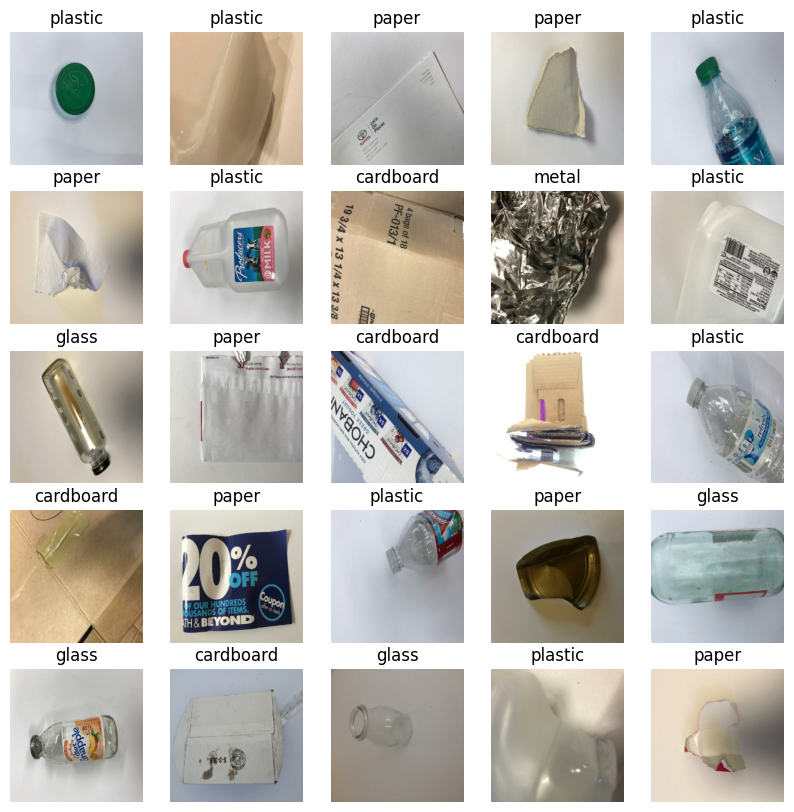

In [12]:
show_25_images(X_train, y_train)

## Using MobileNetV2

In [13]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
   hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/100-224-classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))
])
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.build([None, 224, 224, 3])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 3546277 (13.53 MB)
Trainable params: 3512165 (13.40 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [17]:
model.fit(x = X_train,
          y = y_train,
          epochs=10,
          validation_data = (X_val, y_val))

Epoch 1/10
56/56 [==============================] - 294s 5s/step - loss: 0.6823 - accuracy: 0.8462 - val_loss: 29.4240 - val_accuracy: 0.1504
Epoch 2/10
56/56 [==============================] - 296s 5s/step - loss: 0.8589 - accuracy: 0.8122 - val_loss: 25.7019 - val_accuracy: 0.1504
Epoch 3/10
56/56 [==============================] - 294s 5s/step - loss: 0.5305 - accuracy: 0.8801 - val_loss: 10.9626 - val_accuracy: 0.3113
Epoch 4/10
56/56 [==============================] - 296s 5s/step - loss: 0.4479 - accuracy: 0.9072 - val_loss: 3.3576 - val_accuracy: 0.4987
Epoch 5/10
56/56 [==============================] - 295s 5s/step - loss: 0.3351 - accuracy: 0.9327 - val_loss: 2.8448 - val_accuracy: 0.5937
Epoch 6/10
56/56 [==============================] - 296s 5s/step - loss: 0.3859 - accuracy: 0.9208 - val_loss: 3.2383 - val_accuracy: 0.6702
Epoch 7/10
56/56 [==============================] - 294s 5s/step - loss: 0.4347 - accuracy: 0.9174 - val_loss: 4.6827 - val_accuracy: 0.5805
Epoch 8/10

In [18]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 10s 860ms/step - loss: 6.0493 - accuracy: 0.6053


[6.049323558807373, 0.6052631735801697]

In [44]:
model.save("mobile_model.h5")

### The accuracy isnt high, trying other models

## Using Inception-ResNet-v2

In [49]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-resnet-v2/frameworks/TensorFlow2/variations/classification/versions/2")
])
m.add(tf.keras.layers.Dense(6, activation='softmax'))
model.build([None, 224, 224, 3])

In [25]:
m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
m.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
history = m.fit(x = X_train,
          y = y_train,
          epochs=10,
          validation_data = (X_val, y_val),
          batch_size = 32)

In [ ]:
loss, acc = m.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [ ]:
model.save("resnet.h5")

## Custom CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)
num_classes = 6

model_cnn = Sequential()

model_cnn = Sequential()

model_cnn.add(Conv2D(32,(3,3), padding='same', input_shape=input_shape,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(num_classes,activation='softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()


In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [ ]:
model_cnn.fit(x = X_train,
          y = y_train,
          epochs=10,
          validation_data = (X_val, y_val),
          batch_size = 32,
          callbacks=[checkpoint_callback])

In [ ]:
model_cnn.evaluate(X_test, y_test)

## To predict

Since resnet gave the best results, lets use that for predictions

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming process_image and mobile_net_v2_model are already defined

# Directly use the file path string
img_path = "/kaggle/input/garbage-classification/garbage classification/Garbage classification/trash/trash114.jpg"

# Open and process the image
image = process_image(img_path)
image = np.expand_dims(image, axis=0)

# Predict the class
p = np.argmax(resnet.predict(image))

# Read the image for displaying
a = plt.imread(img_path)

# Assuming classnames is a list of class names
plt.title(f"Prediction: {classnames[p]}")
plt.imshow(a)
plt.show()


NameError: name 'resnet' is not defined